In [2]:
# Setting up all librelies and the Twitter API with authentication pieces
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import pandas as pd
import matplotlib. pyplot as plt 
import numpy as np
import os 
import requests
import seaborn as sns
from functools import reduce

%matplotlib inline 


# Gather 

In [3]:
#Importing the twitter-archive-enhanced.csv file into a DataFrame.
df_twitter_archive =  pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
#  download the image prediction file froem th Udacity website 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join('image_predictions.tsv'), mode  = 'wb') as file:
    file.write(response.content)

In [5]:
df_images = pd.read_csv('image_predictions.tsv', sep = '\t') 
df_images.head(5)   

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
# consumer_key = '..................'
# consumer_secret = '................'
# access_token = '....................'
# access_secret = '..................'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, 
# parser = tweepy.parsers.JSONParser())

In [7]:
# tweet_ids = list(df_twitter_archive['tweet_id'])

# tweet_data = []
# tweet_id_success = []
# tweet_id_missing = []

# for tweet_id in tweet_ids:
#     try:
#         data = api.get_status(tweet_id,
#                               tweet_mode='extended',
#                               wait_on_rate_limit = True,
#                               wait_on_rate_limit_notify = True)
#         tweet_data.append(data)
#         tweet_id_success.append(tweet_id)
#     except:
#         tweet_id_missing.append(tweet_id)

In [8]:
# print("The list of tweets = ", len(tweet_id_success))
# print("The missing list of tweets = ", len(tweet_id_missing))
# print("Tweet data = ", len(tweet_data))

In [9]:
# with open('tweet_json.txt', mode = 'w') as local_file:
#     json.dump(tweet_data, local_file)

# print('tweet_json.txt has been written')

- We reached the limit of Twitter APIs 2 times
- We got 2331 tweet_id  correctly and 25 errors  

In [10]:
# create the third dataframe for tweet_json.txt

# df_list = []
# with open('tweet_json.txt', encoding='utf-8') as f:
#     for line in f:
#         data = json.loads(line[:-1])
#         df_list.append({'tweet_id': data['id_str'],
#                         'retweet_count': data['retweet_count'],
#                         'favorite_count': data['favorite_count']
#                        })
# print(df_list)
#df_tweet_json = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])
#df_tweet_json.head()

In [11]:
# json_twitter = pd.read_json('tweet_json.txt')
# json_twitter['tweet_id'] = tweet_id_success
# json_twitter = json_twitter[['tweet_id', 'favorite_count', 'retweet_count']

In [12]:
# json_twitter.to_csv("tweet_json.csv")

# Assessing Data

### 1. Twitter_achive 

In [13]:
# We assess the twitter_archive DataFrame firstly and we use info method 

df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
df_twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [15]:
sum(df_twitter_archive['tweet_id'].duplicated())

0

In [16]:
df_twitter_archive['retweeted_status_id'].count()

181

In [17]:
df_twitter_archive['name'].value_counts()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
Marty        1
Mya          1
Holly        1
Tedrick      1
Kuyu         1
Name: name, Length: 957, dtype: int64

In [18]:
df_twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [19]:
df_twitter_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [20]:
df_twitter_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [21]:
df_twitter_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [22]:
# use tha sample method to identify any other remaning issues:
df_twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1163,723673163800948736,NaN,NaN,2016-04-23 00:41:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ivar. She is a badass Viking warrior. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/723673163...,10,10,Ivar,None,None,None,None
195,855138241867124737,NaN,NaN,2017-04-20 19:16:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @frasercampbell_: oh my... what's that... b...,8.551225e+17,7.475543e+17,2017-04-20 18:14:33 +0000,https://twitter.com/frasercampbell_/status/855...,14,10,None,None,None,None,None
1511,691416866452082688,NaN,NaN,2016-01-25 00:26:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I present to you... Dog Jesus. 13/10 (he could...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691416866...,13,10,None,None,None,None,None
1528,690348396616552449,NaN,NaN,2016-01-22 01:40:58 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Oddie. He's trying to communicate. 12/...,NaN,NaN,NaN,https://vine.co/v/iejBWerY9X2,12,10,Oddie,None,None,None,None
1825,676470639084101634,NaN,NaN,2015-12-14 18:35:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Three generations of pupper. 11/10 for all htt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676470639...,11,10,None,None,None,pupper,None


In [23]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### Quality 
1. Columns as in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp may have to be dropped. The information of each of this columns conteined is not really needed.
2. Erroneous datatype for tweet_id
3. The columns has variables that are "None" instead of NaN

#### Tidiness 
1. Timestamp sholub be separeted into data and time 
2. Variables as doggo, flooter, pupper, puppo better if we merge them into one column
3. Source column cantains html code that should be cleaned 

### 2. image_predictions

In [24]:
df_images    

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [25]:
df_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
df_images.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1814,833722901757046785,https://pbs.twimg.com/media/C5H6jmgW8AAevqq.jpg,1,West_Highland_white_terrier,0.918144,True,Maltese_dog,0.025721,True,Lakeland_terrier,0.020211,True
662,682638830361513985,https://pbs.twimg.com/media/CXk4W0qWYAMEMEs.jpg,1,English_springer,0.440781,True,Cardigan,0.411182,True,Border_collie,0.022412,True
1841,838083903487373313,https://pbs.twimg.com/media/C6F42cGUYAAIKsX.jpg,2,chow,0.800975,True,seat_belt,0.164133,False,Pomeranian,0.017981,True
951,704871453724954624,https://pbs.twimg.com/media/Ccg02LiWEAAJHw1.jpg,1,Norfolk_terrier,0.689504,True,soft-coated_wheaten_terrier,0.101480,True,Norwich_terrier,0.055779,True
843,695064344191721472,https://pbs.twimg.com/ext_tw_video_thumb/69506...,1,seat_belt,0.522211,False,sunglasses,0.077552,False,ice_lolly,0.051774,False


In [27]:
df_images['p1'].value_counts()

golden_retriever       150
Labrador_retriever     100
Pembroke                89
Chihuahua               83
pug                     57
                      ... 
fountain                 1
skunk                    1
marmot                   1
otter                    1
American_black_bear      1
Name: p1, Length: 378, dtype: int64

#### Quality
1. Lowercase dog breed names
2. Erroneous datatype for tweet_id.
3. There are 2356 tweets in the df_twitter_archive dataframe and 2075 rows in the df_images dataframe. This could mean that there is missing data, or that not all 2356 of the tweets has pictures.

### 3. json_twitter

In [28]:
json_twitter = pd.read_csv('tweet_json.csv')

In [29]:
json_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Unnamed: 0      2331 non-null   int64
 1   tweet_id        2331 non-null   int64
 2   favorite_count  2331 non-null   int64
 3   retweet_count   2331 non-null   int64
dtypes: int64(4)
memory usage: 73.0 KB


In [30]:
json_twitter.head()

,Unnamed: 0,tweet_id,favorite_count,retweet_count
0,0,892420643555336193,35194,7425
1,1,892177421306343426,30461,5522
2,2,891815181378084864,22905,3645
3,3,891689557279858688,38483,7600
4,4,891327558926688256,36751,8185


#### Quality 
1. There are some missing tweet_id compared with twitter_archive data

#### Tidiness Issue
1. json_twitter data should be combined with the twitter_archive data since they are information about the same tweet.

1. Since there are many columns in these dataframes making it hard to read, so we have to delete some of them.Checking the dataframes in Excel, as it turns out there are quit a lot inaccurate such as "a", "an", "the", "very", "by", etc.  


### Clean 

In [31]:
# make copies of the dataframes for cleaning 
df_twitter_archive_clean = df_twitter_archive.copy()
df_images_clean = df_images.copy()
json_twitter_clean = json_twitter.copy()

In [32]:
df_twitter_archive_clean['timestamp'] = pd.to_datetime(df_twitter_archive_clean['timestamp'])
df_twitter_archive_clean['retweeted_status_timestamp'] = pd.to_datetime(df_twitter_archive_clean['retweeted_status_timestamp'])

In [33]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [34]:
df_twitter_archive_clean['source'] = df_twitter_archive_clean['source'].str.replace(r'<(?:a\b[^>]*>|/a>)', '')

In [35]:
df_twitter_archive_clean['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

Columns name contains the missing values with 'None' insted of NaN

In [36]:
df_twitter_archive_clean['name'].replace('None', np.nan, inplace=True)

### Tidiness issue 
##### Issue: 
1 variable(dog breed) in 4 different columns(doggo, flotter, pupper, puppo)

##### Solution:
Extract the all dog breeds from the 'text' column into a new 'dog_breed' column and then drop 4 different columns. Another issue we have to fix it is to replace "None" for NaN in those cells 

In [37]:
# Extract the all dog breeds from the 'text' column into a new 'dog_breed' column
df_twitter_archive_clean['dog_breed'] = df_twitter_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [38]:
df_twitter_archive_clean[['dog_breed', 'doggo', 'floofer', 'pupper', 'puppo']].head(15)

,dog_breed,doggo,floofer,pupper,puppo
0,NaN,None,None,None,None
1,NaN,None,None,None,None
2,NaN,None,None,None,None
3,NaN,None,None,None,None
4,NaN,None,None,None,None
5,NaN,None,None,None,None
6,NaN,None,None,None,None
7,NaN,None,None,None,None
8,NaN,None,None,None,None
9,doggo,doggo,None,None,None


In [39]:
#we see that this method works, so let's drop doggo, floofer, pupper, puppo columns
df_twitter_archive_clean = df_twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [40]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Quality issue
##### Issue: 
Data contains retweets
##### Solution:
There are many columns in this dataframe making it hard to read, and some will not be needed for analysis, so better if delete unneeded columns:
- in_reply_to_status_id
- in_reply_to_user_id
- retweeted_status_id
- retweeted_status_user_id
- retweeted_status_timestamp
- expanded_urls

In [41]:
df_twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                      'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis=1, inplace=True)

In [42]:
df_twitter_archive_clean.head(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_breed
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN


#### Issue: 
The columns 'timestamp' contain year, month, day and hour frame
#### Solution:
Let's split the variables in this columns and create the new appropriate columns and delete 'timestamp'

In [43]:
# Convert the 'timestamp' and split it to date, time, and day of week
temp = pd.DatetimeIndex(df_twitter_archive_clean['timestamp'])

In [44]:
df_twitter_archive_clean['Date'] = temp.date

In [45]:
df_twitter_archive_clean['Year'] = temp.year

In [46]:
df_twitter_archive_clean['Month'] = temp.month

In [47]:
df_twitter_archive_clean['Month'].replace(1, 'January', inplace=True)
df_twitter_archive_clean['Month'].replace(2, 'February', inplace=True)
df_twitter_archive_clean['Month'].replace(3, 'March', inplace=True)
df_twitter_archive_clean['Month'].replace(4, 'April', inplace=True)
df_twitter_archive_clean['Month'].replace(5, 'May', inplace=True)
df_twitter_archive_clean['Month'].replace(6, 'June', inplace=True)
df_twitter_archive_clean['Month'].replace(7, 'July', inplace=True)
df_twitter_archive_clean['Month'].replace(8, 'August', inplace=True)
df_twitter_archive_clean['Month'].replace(9, 'September', inplace=True)
df_twitter_archive_clean['Month'].replace(10, 'October', inplace=True)
df_twitter_archive_clean['Month'].replace(11, 'November', inplace=True)
df_twitter_archive_clean['Month'].replace(12, 'December', inplace=True)

In [48]:
df_twitter_archive_clean['Day_of_week'] = temp.dayofweek

In [49]:
df_twitter_archive_clean['Day_of_week'].replace(0, 'Monday', inplace=True)
df_twitter_archive_clean['Day_of_week'].replace(1, 'Tuesday', inplace=True)
df_twitter_archive_clean['Day_of_week'].replace(2, 'Wednesday', inplace=True)
df_twitter_archive_clean['Day_of_week'].replace(3, 'Thursday', inplace=True)
df_twitter_archive_clean['Day_of_week'].replace(4, 'Friday', inplace=True)
df_twitter_archive_clean['Day_of_week'].replace(5, 'Saturday', inplace=True)
df_twitter_archive_clean['Day_of_week'].replace(6, 'Sunday', inplace=True)

In [50]:
df_twitter_archive_clean['Time'] = temp.time

In [51]:
df_twitter_archive_clean['Hour'] = temp.hour

In [52]:
df_twitter_archive_clean = df_twitter_archive_clean.drop('timestamp', axis=1)

In [53]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   source              2356 non-null   object
 2   text                2356 non-null   object
 3   rating_numerator    2356 non-null   int64 
 4   rating_denominator  2356 non-null   int64 
 5   name                1611 non-null   object
 6   dog_breed           399 non-null    object
 7   Date                2356 non-null   object
 8   Year                2356 non-null   int64 
 9   Month               2356 non-null   object
 10  Day_of_week         2356 non-null   object
 11  Time                2356 non-null   object
 12  Hour                2356 non-null   int64 
dtypes: int64(5), object(8)
memory usage: 239.4+ KB


In [54]:
df_twitter_archive_clean.head()

,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_breed,Date,Year,Month,Day_of_week,Time,Hour
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,2017-08-01,2017,August,Tuesday,16:23:56,16
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,2017-08-01,2017,August,Tuesday,00:17:27,0
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,2017-07-31,2017,July,Monday,00:18:03,0
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,2017-07-30,2017,July,Sunday,15:58:51,15
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,2017-07-29,2017,July,Saturday,16:00:24,16


### Tidyness 
Remove the url from the 'text' columns

#### Issue:
The column 'text' contains text in format This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU with url
#### Solution: 
Isolate the url part in cell 'text' and delete it. 


In [55]:
# create a function 
def store_list(dataframe, column, word):
    my_store_list =[]
    for my_store in dataframe[column]:
        my_store_list.append(my_store)
    all_clean_text = []
    for my_store_1 in my_store_list:
        cleaned_text = my_store_1[:my_store_1.find(word)-1]
        all_clean_text.append(cleaned_text)
    return(all_clean_text)    

In [56]:
df_twitter_archive_clean['new_text'] = store_list(df_twitter_archive_clean, 'text', 'https')

In [57]:
df_twitter_archive_clean.loc[:,['text', 'new_text']]

,text,new_text
0,This is Phineas. He's a mystical boy. Only eve...,This is Phineas. He's a mystical boy. Only eve...
1,This is Tilly. She's just checking pup on you....,This is Tilly. She's just checking pup on you....
2,This is Archie. He is a rare Norwegian Pouncin...,This is Archie. He is a rare Norwegian Pouncin...
3,This is Darla. She commenced a snooze mid meal...,This is Darla. She commenced a snooze mid meal...
4,This is Franklin. He would like you to stop ca...,This is Franklin. He would like you to stop ca...
...,...,...
2351,Here we have a 1949 1st generation vulpix. Enj...,Here we have a 1949 1st generation vulpix. Enj...
2352,This is a purebred Piers Morgan. Loves to Netf...,This is a purebred Piers Morgan. Loves to Netf...
2353,Here is a very happy pup. Big fan of well-main...,Here is a very happy pup. Big fan of well-main...
2354,This is a western brown Mitsubishi terrier. Up...,This is a western brown Mitsubishi terrier. Up...


In [58]:
# Copying the 'new_text' column to the old one:

df_twitter_archive_clean['text'] = store_list(df_twitter_archive_clean, 'text', 'https')
df_twitter_archive_clean = df_twitter_archive_clean.drop(['new_text'], axis=1)

Merge 'df_twitter_archive_clean' and 'json_twitter_clean' into the one dataset

In [59]:
df_twitter_archive_clean = pd.merge(df_twitter_archive_clean, 
                                    json_twitter_clean.loc[:, ['tweet_id',
                                    'favorite_count','retweet_count']],
                                    on='tweet_id', how='left')

In [60]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2356 non-null   int64  
 1   source              2356 non-null   object 
 2   text                2356 non-null   object 
 3   rating_numerator    2356 non-null   int64  
 4   rating_denominator  2356 non-null   int64  
 5   name                1611 non-null   object 
 6   dog_breed           399 non-null    object 
 7   Date                2356 non-null   object 
 8   Year                2356 non-null   int64  
 9   Month               2356 non-null   object 
 10  Day_of_week         2356 non-null   object 
 11  Time                2356 non-null   object 
 12  Hour                2356 non-null   int64  
 13  favorite_count      2331 non-null   float64
 14  retweet_count       2331 non-null   float64
dtypes: float64(2), int64(5), object(8)
memory usage: 294.5+

In [61]:
df_images_clean.loc[:,['p1', 'p2', 'p3']].sample(5)

,p1,p2,p3
1081,Chihuahua,carton,Siberian_husky
1499,Lakeland_terrier,golden_retriever,standard_poodle
1802,whippet,Ibizan_hound,Italian_greyhound
266,Pomeranian,Pekinese,chow
452,vizsla,redbone,basset


In [62]:
# Capitalize all words in columns 'p1', 'p2' and 'p3'.
df_images_clean['p1'] = df_images_clean['p1'].str.title()
df_images_clean['p2'] = df_images_clean['p2'].str.title()
df_images_clean['p3'] = df_images_clean['p3'].str.title()

In [63]:
df_images_clean.loc[:,['p1', 'p2', 'p3']].sample(5)

,p1,p2,p3
1486,Pool_Table,Dining_Table,Microwave
796,Golden_Retriever,Labrador_Retriever,Saluki
1803,Miniature_Pinscher,Chihuahua,Staffordshire_Bullterrier
1071,Siberian_Husky,Malamute,Eskimo_Dog
339,Chihuahua,Badger,Toy_Terrier


#### Issue:  
In dataframe df_images_clean columns as jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog do not have apporpriate titles 
#### Solution:
Rename non-descriptive columns 

In [64]:
df_images_clean = df_images_clean.rename(columns={'p1': 'first_prediction',
                                                  'p1_conf': 'first_pred_conf',
                                                  'p2': 'second_prediction', 
                                                  'p2_conf': 'second_pred_conf',
                                                  'p3': 'third_prediction',
                                                  'p3_conf': 'third_pred_conf',
                                                  'p1_dog': 'dog_first_pred',
                                                  'p2_dog': 'dog_second_pred',
                                                  'p3_dog': 'dog_third_pred'})

In [65]:
df_images_clean.head()

,tweet_id,jpg_url,img_num,first_prediction,first_pred_conf,dog_first_pred,second_prediction,second_pred_conf,dog_second_pred,third_prediction,third_pred_conf,dog_third_pred
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [66]:
twitter_archive_final = pd.merge(df_twitter_archive_clean,
                                 df_images_clean.loc[:,
                                                     ['tweet_id','jpg_url',
                                                      'img_num', 'first_prediction',
                                                      'first_pred_conf', 'dog_first_pred',
                                                      'second_prediction', 'second_pred_conf',
                                                      'dog_second_pred', 'third_prediction',
                                                      'third_pred_conf', 'dog_third_pred']],
                                 on='tweet_id', how='inner')

In [67]:
twitter_archive_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2075 non-null   int64  
 1   source              2075 non-null   object 
 2   text                2075 non-null   object 
 3   rating_numerator    2075 non-null   int64  
 4   rating_denominator  2075 non-null   int64  
 5   name                1497 non-null   object 
 6   dog_breed           338 non-null    object 
 7   Date                2075 non-null   object 
 8   Year                2075 non-null   int64  
 9   Month               2075 non-null   object 
 10  Day_of_week         2075 non-null   object 
 11  Time                2075 non-null   object 
 12  Hour                2075 non-null   int64  
 13  favorite_count      2059 non-null   float64
 14  retweet_count       2059 non-null   float64
 15  jpg_url             2075 non-null   object 
 16  img_nu

In [101]:
twitter_archive_final.head(5)

,tweet_id,source,text,rating_numerator,rating_denominator,name,dog_breed,Date,Year,Month,...,img_num,first_prediction,first_pred_conf,dog_first_pred,second_prediction,second_pred_conf,dog_second_pred,third_prediction,third_pred_conf,dog_third_pred
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,2017-08-01,2017,August,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,2017-08-01,2017,August,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,2017-07-31,2017,July,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,2017-07-30,2017,July,...,1,Paper_Towel,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,2017-07-29,2017,July,...,2,Basset,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True


In [69]:
#using to_csv to write master dataframe to CSV format
twitter_archive_final.to_csv('twitter_archive_final.csv')

### Data Analysis and Visualisation

#### What is the most an effective source for posting ?

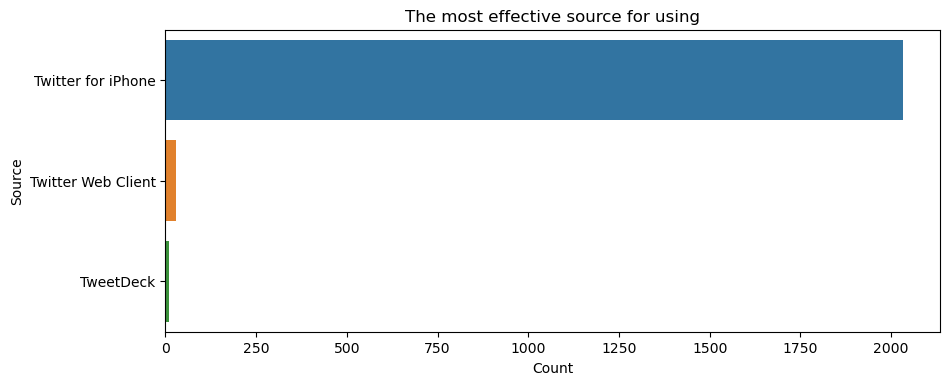

In [70]:
#plot a bar chart where we can see the most effective source for using 
plt.figure(figsize = (10,4), dpi = 100)
sns.barplot(x = twitter_archive_final['source'].value_counts().values,
            y = twitter_archive_final['source'].value_counts().index);
plt.title('The most effective source for using', fontsize = 12)
plt.xlabel('Count');
plt.ylabel('Source');

Based on the result, the most effective source is Twitter for iPhone

In [71]:
# let's check how many tweets have been posted per month
post_per_month = twitter_archive_final.groupby(['Month', 'Year'], 
                               sort=False).count().iloc[::-1, 0]
print(post_per_month)

Month      Year
November   2015    298
December   2015    367
January    2016    169
February   2016    111
March      2016    121
April      2016     54
May        2016     57
June       2016     81
July       2016     94
August     2016     64
September  2016     71
October    2016     71
November   2016     69
December   2016     61
January    2017     77
February   2017     68
March      2017     53
April      2017     44
May        2017     46
June       2017     46
July       2017     51
August     2017      2
Name: tweet_id, dtype: int64


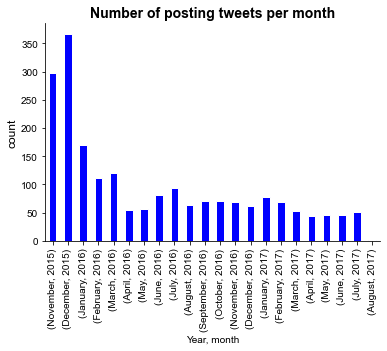

In [72]:
# set a bar 
fig, ax = plt.subplots()
sns.set_style("white")
post_per_month.plot(kind='bar', color='b')
ax.set_title('Number of posting tweets per month', fontsize=14, fontweight="bold")
ax.set_ylabel('count', fontsize=12)
ax.set_xlabel('Year, month')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


From the above results, in November and December of 2015 were the biggest number of posting tweets

#### What is the most common dog?

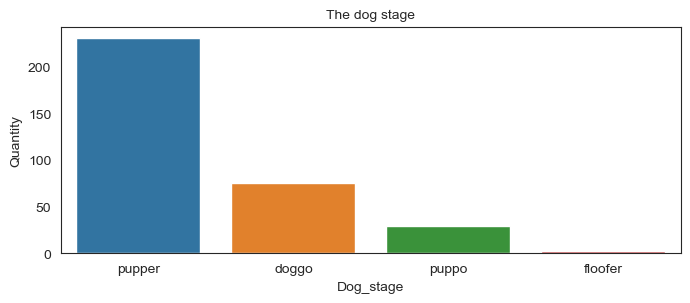

In [73]:
plt.figure(figsize = (8,3), dpi = 100)
sns.barplot(x = twitter_archive_final['dog_breed'].value_counts().index,
            y = twitter_archive_final['dog_breed'].value_counts().values);
plt.title('The dog stage', fontsize = 10)
plt.xlabel('Dog_stage');
plt.ylabel('Quantity');

Pupper is the most common owned dog.

#### On what day of the week was the WeRatedogs posted most tweets?

In [106]:
#let's create a new dataframe df_days 
week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday', 'Saturday']
df_days = pd.DataFrame(twitter_archive_final.groupby('Day_of_week')['tweet_id'].count())
df_days.reset_index(inplace=True)
df_days = df_days.rename(columns={'tweet_id': 'count'})
df_days['Day_of_week'] = df_days.Day_of_week.astype('category')
df_days.Day_of_week.cat.set_categories(week_days, inplace=True)
df_days = df_days.sort_values('Day_of_week')
df_days

,Day_of_week,count
1,Monday,339
5,Tuesday,311
6,Wednesday,314
4,Thursday,291
0,Friday,296
3,Sunday,262
2,Saturday,262


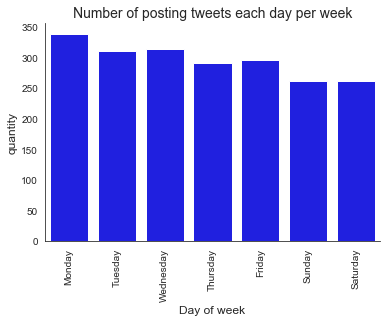

In [107]:
#let's see this visualisation on a bar chart
fig, ax = plt.subplots()
sns.set_style("white")
sns.barplot(x="Day_of_week", y="count", data=df_days, color='b')
ax.set_title('Number of posting tweets each day per week', fontsize=14)
ax.set_ylabel('quantity', fontsize=12)
ax.set_xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

 From the result above, the biggest number of posting tweets we have on Monday and Wednesday

#### Are the favorites and retweets an effective measure of Twitter?

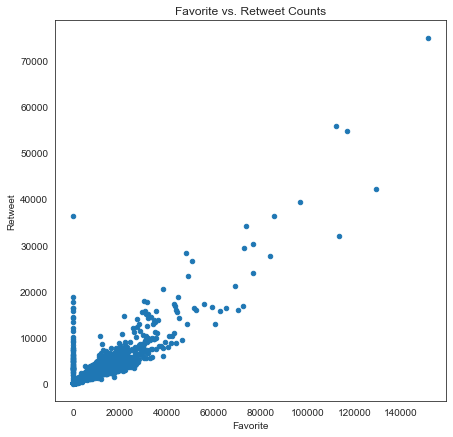

In [102]:
# scatterplot between 'favorite_count' and 'retweet_count' variables to examine their relationship.
twitter_archive_final.plot(x='favorite_count', y='retweet_count', kind='scatter', figsize=(7, 7));
plt.title("Favorite vs. Retweet Counts");
plt.xlabel("Favorite");
plt.ylabel("Retweet");
plt.savefig('fav_retweet_scatter', bbox_inches='tight')

Retweets are positively correlated with Likes.

In [104]:
twitter_archive_final.first_prediction.value_counts()
twitter_archive_final.second_prediction.value_counts()
twitter_archive_final.third_prediction.value_counts()

Labrador_Retriever          79
Chihuahua                   58
Golden_Retriever            48
Eskimo_Dog                  38
Kelpie                      35
                            ..
Lion                         1
Screen                       1
Whiptail                     1
European_Fire_Salamander     1
Canoe                        1
Name: third_prediction, Length: 408, dtype: int64

The top three tweeteed Dog Breeds are abrador_Retriever, Chihuahua , Golden_Retriever 

#### What is the most common dog name in the database?


In [105]:
twitter_archive_final['name'].value_counts()[:10]

a          55
Charlie    11
Cooper     10
Oliver     10
Tucker     10
Penny      10
Lucy       10
Bo          8
Sadie       8
Lola        8
Name: name, dtype: int64

As it turns out, we face with one more tidy issue, it's the name 'a'. Since we did not check the 'name' column deeper this has affected on the final result.
In our case the most common dogs name is Charlie.